In [119]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

In [120]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [121]:
x_train.shape

(60000, 28, 28)

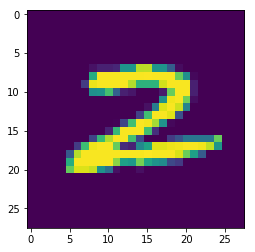

In [122]:
index = 199
plt.imshow(x_train[index])

In [124]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [125]:
x_train.shape

(60000, 784)

In [126]:
x_test.shape

(10000, 784)

In [127]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [128]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [129]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [133]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2180 - acc: 0.9322 - val_loss: 0.0931 - val_acc: 0.9720
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0812 - acc: 0.9747 - val_loss: 0.0743 - val_acc: 0.9768
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0543 - acc: 0.9836 - val_loss: 0.0697 - val_acc: 0.9807
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0393 - acc: 0.9880 - val_loss: 0.0804 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0287 - acc: 0.9913 - val_loss: 0.0918 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0947 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0203 - acc: 0.9940 - val_loss: 0.1008 - val_ac

In [134]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14298124872130374
Test accuracy: 0.9813
